# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [5]:
df = pd.read_csv('../data/states_edu.csv')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [7]:
print(df.head())

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *CHOSE 8th Grade MATH*

In [13]:
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

How many years of data are logged in our dataset? 

In [15]:
print("max year:", df['YEAR'].max())
print("min year:",df['YEAR'].min())
print("num of years:",df['YEAR'].max() - df['YEAR'].min())


max year: 2019
min year: 1990
num of years: 29


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [35]:
df_mich = df[df['STATE'] == 'MICHIGAN']
df_ohio = df[df['STATE'] == 'OHIO']
print("mich avg 8th grade math score:", df_mich['AVG_MATH_8_SCORE'].mean())
print("ohio avg 8th grade math score:", df_ohio['AVG_MATH_8_SCORE'].mean())
if df_mich['AVG_MATH_8_SCORE'].mean() > df_ohio['AVG_MATH_8_SCORE'].mean():
    print("michigan has higher avg scores in 8th grade math across all years")
else:
    print("ohio has higher avg scores in 8th grade math across all years")

mich avg 8th grade math score: 276.1666666666667
ohio avg 8th grade math score: 282.25
ohio has higher avg scores in 8th grade math across all years


Find the average for your chosen test across all states in 2019

In [41]:
df_2019 = df[df['YEAR'] == 2019]
print("avg of 8th grade math score across all states in 2019:", df_2019['AVG_MATH_8_SCORE'].mean())

avg of 8th grade math score across all states in 2019: 281.2641509433962


For each state, find a maximum value for your chosen test score

In [43]:
max_test_scores = df.groupby('STATE')['AVG_MATH_8_SCORE'].max()
print(max_test_scores)

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [51]:
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']
df['REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['ENROLL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL']

In [57]:
df['AVG_MATH_8_SCORE'] = df['AVG_MATH_8_SCORE'].fillna(df['AVG_MATH_8_SCORE'].median())
df['EXPENDITURE_PER_STUDENT'] = df['EXPENDITURE_PER_STUDENT'].fillna(df['EXPENDITURE_PER_STUDENT'].median())
df['REVENUE_PER_STUDENT'] = df['REVENUE_PER_STUDENT'].fillna(df['REVENUE_PER_STUDENT'].median())
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE_PER_STUDENT'].fillna(df['INSTRUCTION_EXPENDITURE_PER_STUDENT'].median())

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

I created some features like Expenditure Per Student, Revenue Per Student, and Instruction Expenditure Per Student in order to gauge the importance of these factors in overall academic performance.

I thought that if a state had higher expenditure per student, maybe the students in that state perform better academically. 
Instruction expenditure is also a similar reasoning. If more money is spent for instruction materials by the state, the students may have a better access to such new, modern and better technology, which is what might be causing the boost in the academic performance in the state.

Revenue per student might also be a good indicator of how academic performance is influencing revenue of the state.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

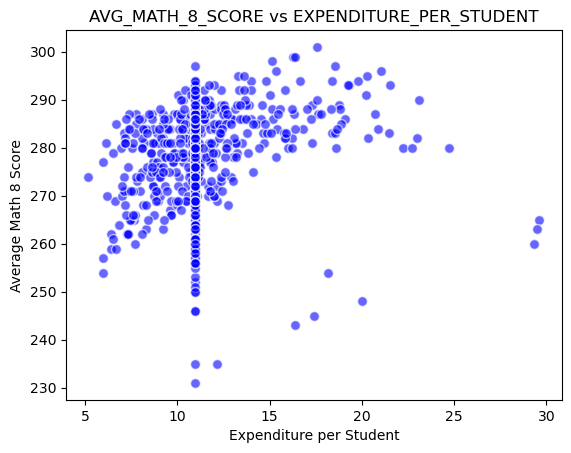

In [64]:
df.plot.scatter(x='EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6, c='blue', edgecolors='w', s=50)
plt.title('AVG_MATH_8_SCORE vs EXPENDITURE_PER_STUDENT')
plt.xlabel('Expenditure per Student')
plt.ylabel('Average Math 8 Score')
plt.show()

**<CAPTION FOR VIZ 1>**

Scatter plot showing the relationship between average math scores for 8th grade students (AVG_MATH_8_SCORE) and the expenditure per student (EXPENDITURE_PER_STUDENT). Each point represents the level of expenditure and average score of students. This plot shows that scores tend to increase until the expenditure per student hits around 15k, after then the scores level off to around 285.

**Visualization 2**

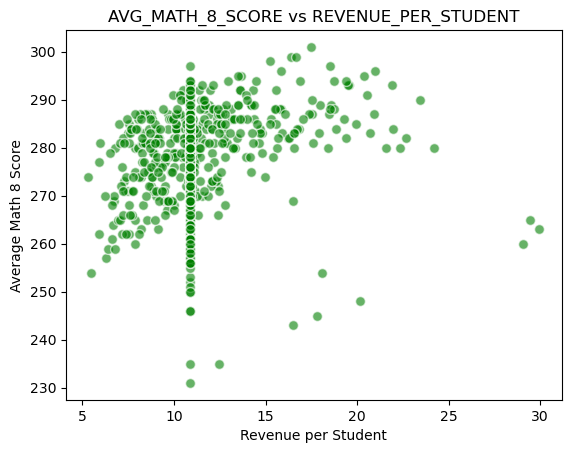

In [66]:
df.plot.scatter(x='REVENUE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6, c='green', edgecolors='w', s=50)
plt.title('AVG_MATH_8_SCORE vs REVENUE_PER_STUDENT')
plt.xlabel('Revenue per Student')
plt.ylabel('Average Math 8 Score')
plt.show()

**<CAPTION FOR VIZ 2>**
Scatter plot illustrating the relationship between average math scores for 8th grade students (AVG_MATH_8_SCORE) and the revenue per student (REVENUE_PER_STUDENT). It shows similar trend as the previous plot, where revenue per student is increasing until around 15 and then levels off.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [76]:
from sklearn.model_selection import train_test_split

In [68]:
X = df[["EXPENDITURE_PER_STUDENT", "REVENUE_PER_STUDENT", "INSTRUCTION_EXPENDITURE_PER_STUDENT"]].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [82]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [86]:
# create your model here
model = LinearRegression()

In [88]:
model.fit(X_train, y_train)

LinearRegression()

In [90]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [92]:
print(model.intercept_)
print(model.coef_)

269.76799895004484
[-0.82280787 -0.69314229  4.43409898]


In [94]:
model.score(X_test, y_test)

0.10214483718101341

In [96]:
np.mean(model.predict(X_test)-y_test)

0.29235402670375676

In [98]:
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

7.326468160551771

In [100]:
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

9.42711685680102

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

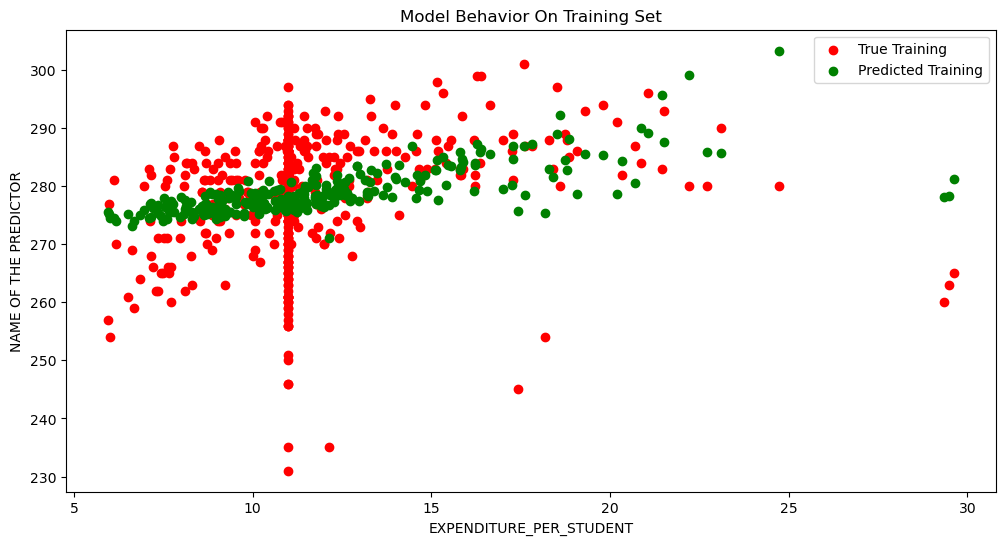

In [102]:
col_name = 'EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

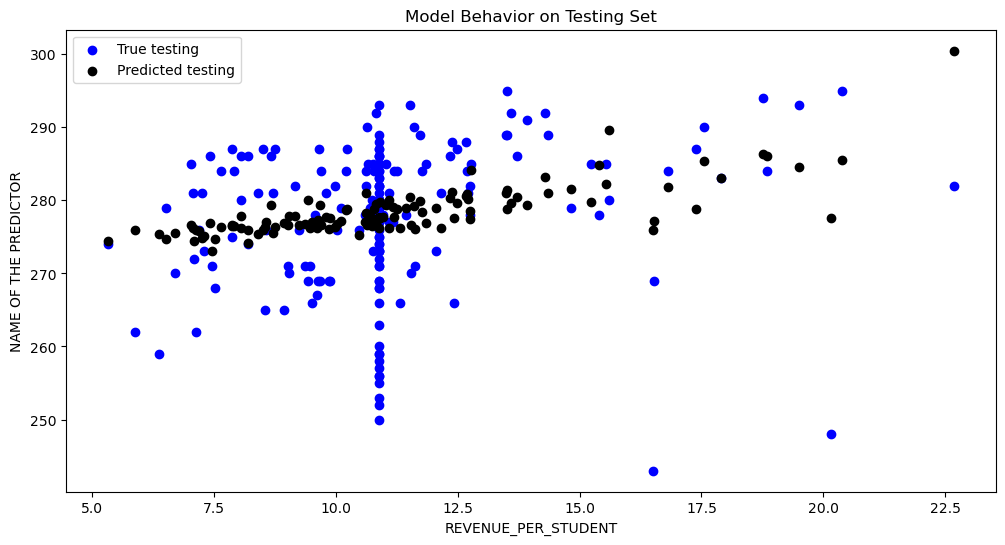

In [106]:
col_name = 'REVENUE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('NAME OF THE PREDICTOR')
plt.title("Model Behavior on Testing Set")